# Prediction of Wine Type and Quality using Deep Learning 

## Wine Type Prediction 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# DL Model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping

In [3]:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

red['type'] = 1
white['type'] = 0

wines = pd.concat([red, white], ignore_index=True)
wines.dropna(inplace=True)

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [6]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.0


In [7]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,0.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,0.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,0.0


In [8]:
wines.shape

(6497, 13)

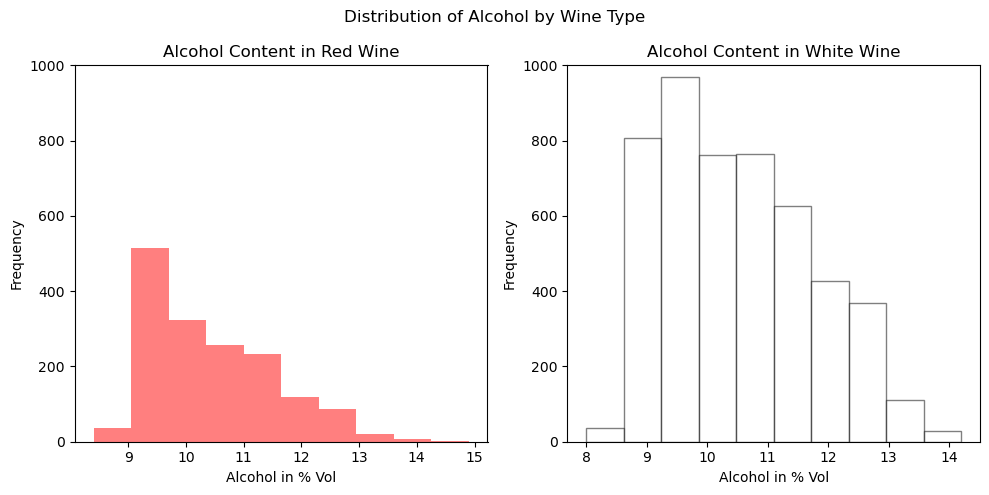

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(wines[wines['type'] == 1].alcohol, bins=10, facecolor='red', alpha=0.5, label='Red wine')
ax[1].hist(wines[wines['type'] == 0].alcohol, bins=10, facecolor='white', edgecolor='black', lw=0.5, alpha=0.5, label='White wine')

for a in ax:
    a.set_ylim([0, 1000])
    a.set_xlabel('Alcohol in % Vol')
    a.set_ylabel('Frequency')

ax[0].set_title('Alcohol Content in Red Wine')
ax[1].set_title('Alcohol Content in White Wine')

fig.suptitle('Distribution of Alcohol by Wine Type')
plt.tight_layout()
plt.show()

In [10]:
X = wines.drop(['quality','type'], axis=1)  #Use .drop() when you want to split by column names
#X = wines.iloc[:, :-1]        # Use iloc when you want to split by column positions

y = wines['type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your features dataframe


X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=18)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=18)

# Result:
# X_train → 70%
# X_val   → 15%
# X_test  → 15%

In [11]:
# DL Model
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=X_train.shape[1]))  # input_dim=11, Hidden layer 
model.add(Dense(9, activation='relu'))                               # Hidden layer
model.add(Dense(1, activation='sigmoid'))                            # Output layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# Input layer: 12 neurons
# Output layer: 1 

C:\Users\admin\anaconda3\envs\new_tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250 (1000.00 B)

 Trainable params: 250 (1000.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# If you don't know the optimum number of epochs use EarlyStopping method

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history=model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=30,  # Set high limit
          batch_size=1,
          verbose=1,
          callbacks=[early_stop])
print(history)

Epoch 1/30
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8654 - loss: 0.2771 - val_accuracy: 0.9938 - val_loss: 0.0228
Epoch 2/30
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9920 - loss: 0.0338 - val_accuracy: 0.9959 - val_loss: 0.0140
Epoch 3/30
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9957 - loss: 0.0259 - val_accuracy: 0.9979 - val_loss: 0.0081
Epoch 4/30
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9951 - loss: 0.0236 - val_accuracy: 0.9959 - val_loss: 0.0126
Epoch 5/30
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9949 - loss: 0.0242 - val_accuracy: 0.9979 - val_loss: 0.0093


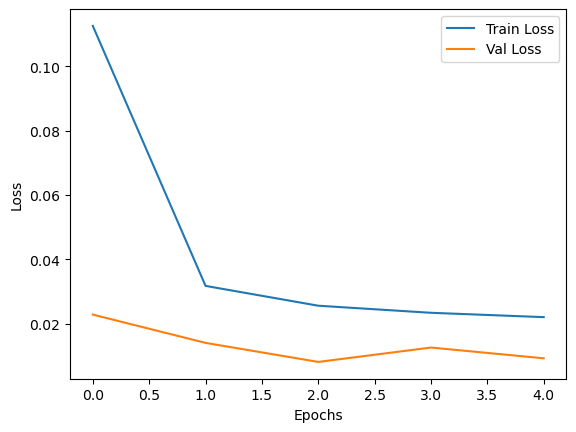

In [13]:
plt.plot(history.history['loss'], label='Train Loss') 
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Prediction Step

y_pred = model.predict(X_test)

y_pred_labels = (y_pred >= 0.5).astype(int)

for prediction in y_pred_labels[:12]:
    wine_type = "Red wine" if prediction == 1 else "White wine"
    print(f"Prediction: {wine_type}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine


In [15]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9969


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Now, get the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[753   0]
 [  3 219]]


## Wine Quality Prediction

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# DL Model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping

# ML Models
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [18]:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')


wines = pd.concat([red, white], ignore_index=True)
wines.dropna(inplace=True)

In [19]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


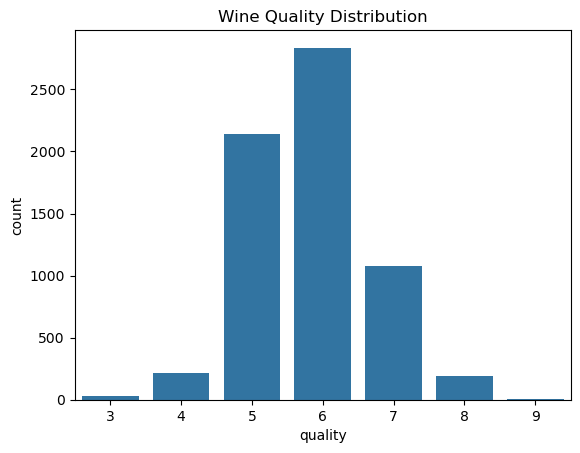

In [21]:
# Wine quality distribution
# we can use the same code to see the quality of red and white wine just by changing the data

sns.countplot(x='quality', data=wines)
plt.title('Wine Quality Distribution')
plt.show()


In [22]:
# count on each quality 
print(wines['quality'].value_counts().sort_index())

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


In [23]:
X=wines.drop('quality',axis=1)   # Features
y=wines['quality']               # Target

# Always scale features before training a neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Test_train_split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=18)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=18)

# Result:
# X_train → 80%
# X_val   → 10%
# X_test  → 10%

In [24]:
# DL Model (FNN)
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=X_train.shape[1]))  # input_dim=11  hidden layer
model.add(Dense(8, activation='relu'))                               # Hidden layer
model.add(Dense(1))  # No activation for regression output             Output layer

C:\Users\admin\anaconda3\envs\new_tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
#  Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')   # Use mean_squared_error for regression

In [26]:
#  Train the model

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.fit(X_train, y_train, 
          epochs=100, 
          batch_size=8, 
          validation_data=(X_val, y_val),
          callbacks=[early_stop])


Epoch 1/100
650/650 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 13.6316 - val_loss: 2.0413
Epoch 2/100
650/650 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.8901 - val_loss: 1.1686
Epoch 3/100
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.1584 - val_loss: 0.8279
Epoch 4/100
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8729 - val_loss: 0.6941
Epoch 5/100
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7328 - val_loss: 0.5918
Epoch 6/100
650/650 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.6083 - val_loss: 0.5644
Epoch 7/100
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5719 - val_loss: 0.5596
Epoch 8/100
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5749 - val_loss: 0.5207
Epoch 9/100
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5363 - val_loss: 0.5052
Epoch 10/100
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5421 - val_loss: 0.5084
Epoch 11/100
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5554 - val_loss: 0.5286


In [27]:
# Predict and evaluate

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error: 0.5051981806755066
R² Score: 0.2823503613471985


In [28]:
# ML Model(Linear Regression)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [29]:
# for R^2 and MSE
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.48684535521126937
R² Score: 0.29496874855865385


In [16]:
# ML Model(xgboost)

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [17]:
# R^2 and MSE
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.4529462456703186
MSE: 0.37775710225105286


In [18]:
# ML Model(Random Forest)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [19]:
# R^2 and MSE

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.5159462928750399
MSE: 0.3342536923076923


In [22]:
# ML Model(Gradient Boosting Regressor)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [23]:
# R^2 and MSE

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.3956248767558441
MSE: 0.4173392611393118
